In [ ]:
!pip install opencv-contrib-python


In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload your image and video file here


Saving jeans.jpg to jeans.jpg


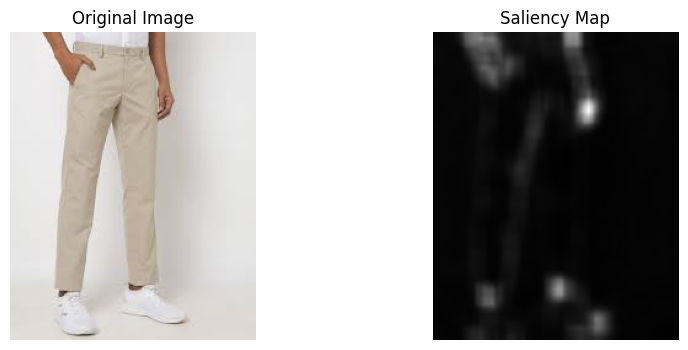

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, clear_output

# Initialize the saliency detector
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()

# ---------- IMAGE ----------
image_path = "/content/jeans.jpg"  # Replace with uploaded image file name
image = cv2.imread(image_path)
(success, saliencyMap) = saliency.computeSaliency(image)
saliencyMap = (saliencyMap * 255).astype("uint8")

# Show results using matplotlib (for Colab compatibility)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Saliency Map")
plt.axis("off")
plt.imshow(saliencyMap, cmap='gray')
plt.show()




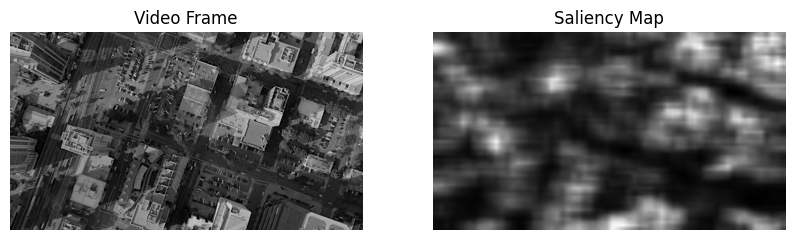

In [ ]:
# ---------- VIDEO ----------
video_path = "/content/input_videos.mp4"  # Replace with uploaded video file name
cap = cv2.VideoCapture(video_path)

frame_count = 0
while cap.isOpened() and frame_count < 30:  # Process only first 30 frames for brevity
    ret, frame = cap.read()
    if not ret:
        break

    success, saliencyMap = saliency.computeSaliency(frame)
    saliencyMap = (saliencyMap * 255).astype("uint8")

    # Display
    clear_output(wait=True)
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title("Video Frame")
    plt.axis("off")
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 2, 2)
    plt.title("Saliency Map")
    plt.axis("off")
    plt.imshow(saliencyMap, cmap='gray')
    plt.show()

    frame_count += 1

cap.release()

In [ ]:
!pip install opencv-python-headless networkx matplotlib


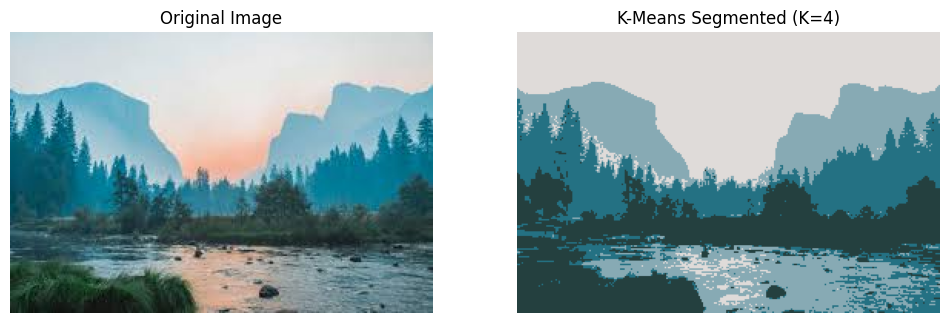

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image
image = cv2.imread("/content/landscape.jpeg")  # Replace with your uploaded file
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define stopping criteria and number of clusters (K)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
K = 4  # Number of clusters
_, labels, centers = cv2.kmeans(pixel_values, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers back to 8-bit values
centers = np.uint8(centers)

# Map labels to center colors
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Reshape labels for masking
labels_reshape = labels.reshape(image.shape[:2])

# Plot original and segmented images
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title(f"K-Means Segmented (K={K})")
plt.imshow(segmented_image)
plt.axis("off")
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('/content/.jpg')  # Replace with your image file
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask = np.zeros(img.shape[:2], np.uint8)

# Background and foreground models (internal use)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Define a rectangle that includes the object to be segmented
rect = (50, 50, img.shape[1] - 100, img.shape[0] - 100)

# Apply GrabCut algorithm
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Update mask: probable foreground/background → sure foreground/background
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
segmented = img_rgb * mask2[:, :, np.newaxis]

# Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Segmentation Mask")
plt.imshow(mask2, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Segmented Result")
plt.imshow(segmented)
plt.axis("off")
plt.show()


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


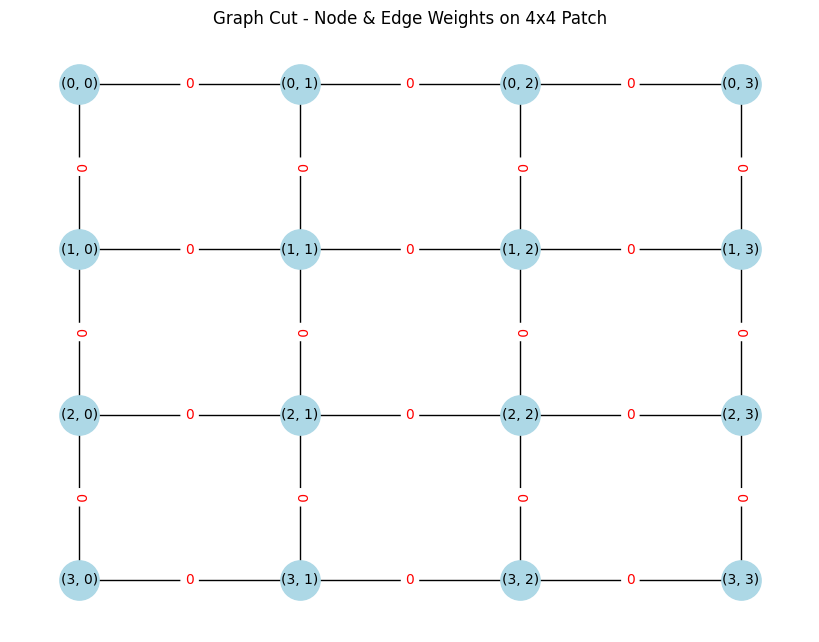

In [ ]:
import networkx as nx

# Convert image to grayscale and crop a small region
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
patch = gray[:4, :4]  # small 4x4 patch for graph visualization

# Create a graph
G = nx.Graph()

# Add nodes and edges
rows, cols = patch.shape
for i in range(rows):
    for j in range(cols):
        node = (i, j)
        G.add_node(node, intensity=patch[i, j])

        # Add edges with 4-connectivity (up, down, left, right)
        if i + 1 < rows:
            G.add_edge(node, (i + 1, j), weight=abs(int(patch[i, j]) - int(patch[i + 1, j])))
        if j + 1 < cols:
            G.add_edge(node, (i, j + 1), weight=abs(int(patch[i, j]) - int(patch[i, j + 1])))

# Draw the graph
pos = {(i, j): (j, -i) for i in range(rows) for j in range(cols)}
edge_labels = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title("Graph Cut - Node & Edge Weights on 4x4 Patch")
plt.show()


In [ ]:
!pip install opencv-python-headless imageio scikit-image matplotlib torch torchvision
!pip install moviepy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 40.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin